In [1]:
# Imporing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the hospital dataset
hospital=pd.read_csv("Data/hospitals.csv")

In [3]:
hospital.head()

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [4]:
hospital = hospital.rename(columns={hospital.columns[0]: 'State/UT'})

In [5]:
# Renaming the columns
new_names = {
    'PHC': 'Number of Primary Health Centers',
    'CHC': 'Community Health Centers',
    'SDH': 'Sub-District/Divisional Hospitals',
    'DH': 'District Hospitals',
    
}

In [6]:
hospital = hospital.rename(columns=new_names)

In [7]:
hospital

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra & Nagar Haveli,9,2,1,1,13,568
8,Daman & Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


In [8]:
# Replacing & with and in State/UT column
hospital["State/UT"]=hospital["State/UT"].str.replace("&","and")

In [9]:
# Saving hospital dataset
hospital.to_csv('Clean_data/all_hospitals.csv', index=False)

In [10]:
hospital.head()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [11]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State/UT                           37 non-null     object
 1   Number of Primary Health Centers   37 non-null     object
 2   Community Health Centers           37 non-null     object
 3   Sub-District/Divisional Hospitals  30 non-null     object
 4   District Hospitals                 37 non-null     object
 5   Hospitals                          37 non-null     object
 6   HospitalBeds                       37 non-null     object
dtypes: object(7)
memory usage: 2.1+ KB


In [12]:
total = hospital.iloc[-1]
#df = df.append(total, ignore_index=True)


In [13]:
# Droping last row
hospital = hospital.drop(hospital.index[-1])

In [14]:
hospital["HospitalBeds"]=hospital["HospitalBeds"].astype(int)

## Visuals

<function matplotlib.pyplot.show(close=None, block=None)>

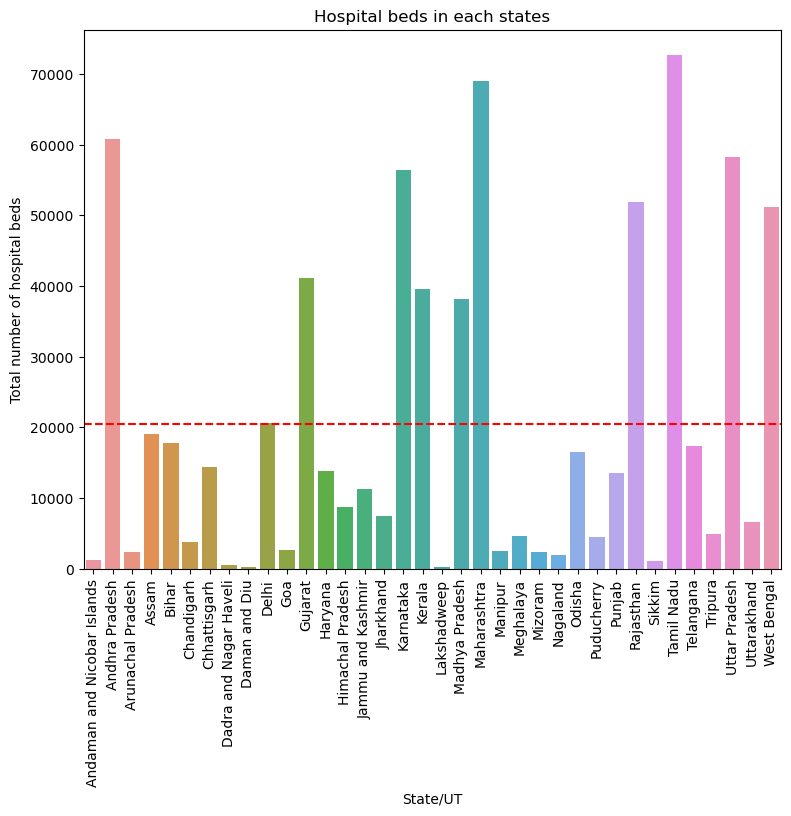

In [23]:
plt.figure(figsize=(9, 7))
sns.barplot(x='State/UT', y='HospitalBeds', data=hospital)


# Calculate average value of the y-axis
average = hospital['HospitalBeds'].mean()

# Add horizontal line at the average value of the y-axis
plt.axhline(y=average, color='r', linestyle='--')




# adding labels to the chart
plt.xlabel('State/UT')
plt.ylabel('Total number of hospital beds')
plt.title('Hospital beds in each states')
plt.xticks(rotation=90)


# Save the plot as a PNG file
plt.savefig("Hospital_beds.png", dpi=300, bbox_inches="tight")

plt.show